In [69]:
%matplotlib inline
from pylab import *
import ccfun
import pamfunlab7
import wavfun as wf
import ascfun as af

In [70]:
di = [1,0,1,1,0,0]
GD = [[1,0],[1,1]]
ci = ccfun.ccencod10(di,GD)
ci

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

Convolutional encoder is successfully tested

In [71]:
di = [1,0,1,1,0,0]
GD = [[1,0],[1,1]]
ci = ccfun.ccencod10(di,GD)                              # di sequence encoded to ci
ci

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [72]:
for i in range(len(ci)):
    ci[i] = 2*ci[i] - 1
ci                                                 #polar sequence

array([ 1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1])

In [73]:
nt = randn(len(ci))                        # Gaussian noise
bi = ci + nt                               # sequence with noise added

In [74]:
dihat,DM = ccfun.ccdecod10(bi)             # decoding function applied to bi sequence

In [75]:
dihat

array([1, 0, 1, 1, 0, 0])

Here we can see that dihat is equal to di sequence

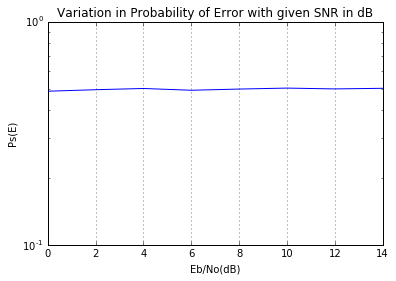

In [76]:
Fs = 1000                                                    # Sampling rate 
FB = 100                                                     # Baud rate FB 
N = 1000                                                     # Number of symbols 
PsE = []                                                      # initializing Probability of error as empty array
Nerr = []                                                     # initializing no. of error bits as empty array
multiplier = 10
EbNodB = arange(0,16,2)                                  # Specified SNR Eb/No in dB 
ptype, pparms = 'rect',[]                                # Pulse type/parameters 
an_set = [-1,+1]                                         # Set of possible an values 
M = len(an_set)                                          # Number of signal levels 

# ***** Compute Eb for given p(t) and signal constellation ***** 
an1 = hstack((zeros(500),1,zeros(499)))
an2 = hstack((zeros(500),-1,zeros(499)))
ttx1,ax1 = pamfunlab7.pam12(an1,100,1000,'rect')
ttx2,ax2 = pamfunlab7.pam12(an2,100,1000,'rect')
Es1 = cumsum(ax1**2.0)/float(Fs)
Es2 = cumsum(ax2**2.0)/float(Fs)
Eb = (Es1+ Es2)/(2.0*log2(M))
Eb = Eb[-1]
        
for i in range(len(EbNodB)): 
    #*****compute value of No*****
    EbNo = np.power(10.0,(EbNodB[i]/10))                        #linear value of SNR
    No =(2.0*Eb/EbNo)                                              #Value of No
    Nerrblock = []                                  # initializing Nerr for one block as empty array for every value of EbNodB
    
    for r in range(multiplier):
        
        # ***** Generate PAM signal using random data ***** 
        dn = array(floor(2*rand(N)),int)                          # Random binary data signal 
        dnci = ccfun.ccencod10(dn,[[1,0],[1,1]])
        #dnci = reshape(dnci,len(dnci))
        an = [0]*len(dnci)
        for zz in range(len(dnci)):
            an[zz] = 2*dnci[zz]-1                                               # Polar binary sequence 
        tt, st = pamfunlab7.pam12(an, FB, Fs, ptype, pparms)      # PAM signal 
        # ***** Generate Gaussian noise signal ***** 
        nt = randn(len(tt))                                       # Gaussian noise 
        Pnt = Fs*No/2.0 # Noise power in freq domain
        An = sqrt(Pnt)
        # >>>>> Compute An such that rt has desired SNR Eb/No <<<<< 
        rt = st + An*nt                                           # Noisy PAM signal 
        # ***** PAM signal receiver ***** 
        dly = 0 
        bn, bt, ixn = pamfunlab7.pamrcvr10(tt, rt, [FB, dly], ptype, pparms) 
        dnhat = array(zeros(len(bn)),int) 
        ix = where(bn > 0)[0] 
        dnhat[ix] = ones(len(ix))                                 # Received binary data, quantized 
        for xx in range(len(dnhat)):
            dnhat[xx] = 2*dnhat[xx] - 1
        dnhatdi,DM = ccfun.ccdecod10(dnhat)
        # ***** Compare dn, dnhat and compute Ps(E) ***** 
        xor = logical_xor(dn,dnhatdi)
        xor.astype(int)
        Nerrblock.append(cumsum(xor)[-1])
        
    Nerr.append(cumsum(Nerrblock)[-1])
    PsE.append(Nerr[i]/(N*multiplier))
    
semilogy(EbNodB,PsE)
grid()
title('Variation in Probability of Error with given SNR in dB')
xlabel('Eb/No(dB)')
ylabel('Ps(E)')


In [77]:
dnci

array([0, 0, 0, ..., 1, 0, 1])

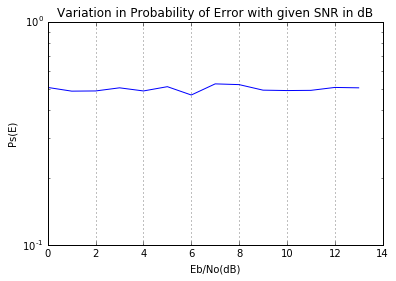

In [19]:
Fs = 1000                                                    # Sampling rate 
FB = 100                                                     # Baud rate FB 
N = 1000                                                     # Number of symbols 
PsE = []                                                      # initializing Probability of error as empty array
Nerr = []                                                     # initializing no. of error bits as empty array
multiplier = 1
EbNodB = arange(0,14,1)                                  # Specified SNR Eb/No in dB 
ptype, pparms = 'rect',[]                                # Pulse type/parameters 
an_set = [-1,+1]                                         # Set of possible an values 
M = len(an_set)                                          # Number of signal levels 

for i in range(len(EbNodB)): 
    Nerrblock = []                                  # initializing Nerr for one block as empty array for every value of EbNodB
    
    for r in range(multiplier):
        # ***** Compute Eb for given p(t) and signal constellation ***** 
        an1 = hstack((zeros(500),1,zeros(499)))
        an2 = hstack((zeros(500),-1,zeros(499)))
        ttx1,ax1 = pamfunlab7.pam12(an1,100,1000,'rect')
        ttx2,ax2 = pamfunlab7.pam12(an2,100,1000,'rect')
        Es1 = cumsum(ax1**2.0)/float(Fs)
        Es2 = cumsum(ax2**2.0)/float(Fs)
        Eb = (Es1+ Es2)/2*(2.0*log2(M))
        Eb = Eb[-1]
        #*****compute value of No*****
        EbNo = np.power(10.0,(EbNodB[i]/10))                        #linear value of SNR
        No =(Eb/EbNo)                                              #Value of No
        # ***** Generate PAM signal using random data ***** 
        dn = array(floor(2*rand(N)),int)                          # Random binary data signal 
        dnci = ccfun.ccencod10(dn,[[1,0],[1,1]])
        dnci = reshape(dnci,len(dnci))
        an = [0]*len(dnci)
        for zz in range(len(dnci)):
            an[zz] = 2*dnci[zz]-1                                               # Polar binary sequence 
        tt, st = pamfunlab7.pam12(an, FB, Fs, ptype, pparms)      # PAM signal 
        # ***** Generate Gaussian noise signal ***** 
        nt = randn(len(tt))                                       # Gaussian noise 
        Pnt = Fs*No/2.0 # Noise power in freq domain
        An = sqrt(Pnt)
        # >>>>> Compute An such that rt has desired SNR Eb/No <<<<< 
        rt = st + An*nt                                           # Noisy PAM signal 
        # ***** PAM signal receiver ***** 
        dly = 0 
        bn, bt, ixn = pamfunlab7.pamrcvr10(tt, rt, [FB, dly], ptype, pparms) 
        #dnhat = array(zeros(len(bn)),int) 
        #ix = where(bn > 0)[0] 
        #dnhat[ix] = ones(len(ix))                                 # Received binary data, quantized 
        dnhatdi,DM = ccfun.ccdecod10(bn)
        # ***** Compare dn, dnhat and compute Ps(E) ***** 
        xor = logical_xor(dn,dnhatdi)
        xor.astype(int)
        Nerrblock.append(cumsum(xor)[-1])
        
    Nerr.append(cumsum(Nerrblock)[-1])
    PsE.append(Nerr[i]/(N*multiplier))
    
semilogy(EbNodB,PsE)
grid()
title('Variation in Probability of Error with given SNR in dB')
xlabel('Eb/No(dB)')
ylabel('Ps(E)')


In [10]:
rt,Fs = wf.wavread('pamsig701.wav')
tt = arange(len(rt))/float(Fs)

In [11]:
bn,bt,ixn = pamfunlab7.pamrcvr10(tt,rt,[100,0],'rect')

In [12]:
dihat,DM = ccfun.ccdecod10(bn)             # decoding function applied to bi sequence

In [13]:
txthat = af.bin2asc(dihat,8) # converting input sequence into output text

print(txthat) # Printing result

The military budgets of most indtstrialized nations can afford to break 64-bit keys.


# The required message was successfully decoded.